In [1]:
# data: banknotes.csv
# location: https://mitu.co.in/dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('banknotes.csv')
df

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [5]:
df.shape

(1372, 5)

In [6]:
# separate the data

x = df.drop('Class', axis = 1)

y = df['Class']

### cross  validation

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                   random_state=0,
                                                   test_size= 0.25)

### Build the model 

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
dt = DecisionTreeClassifier(random_state=0)

In [11]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

### Evaluate

In [12]:
y_pred = dt.predict(x_test)

In [13]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score

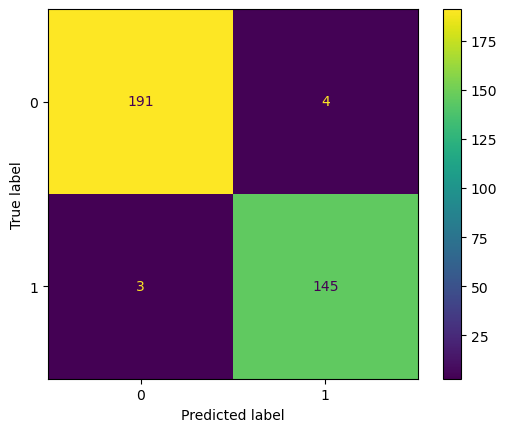

In [14]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       195
           1       0.97      0.98      0.98       148

    accuracy                           0.98       343
   macro avg       0.98      0.98      0.98       343
weighted avg       0.98      0.98      0.98       343



In [16]:
accuracy_score(y_test, y_pred)

0.9795918367346939

### plot the tree

In [17]:
from sklearn.tree import plot_tree

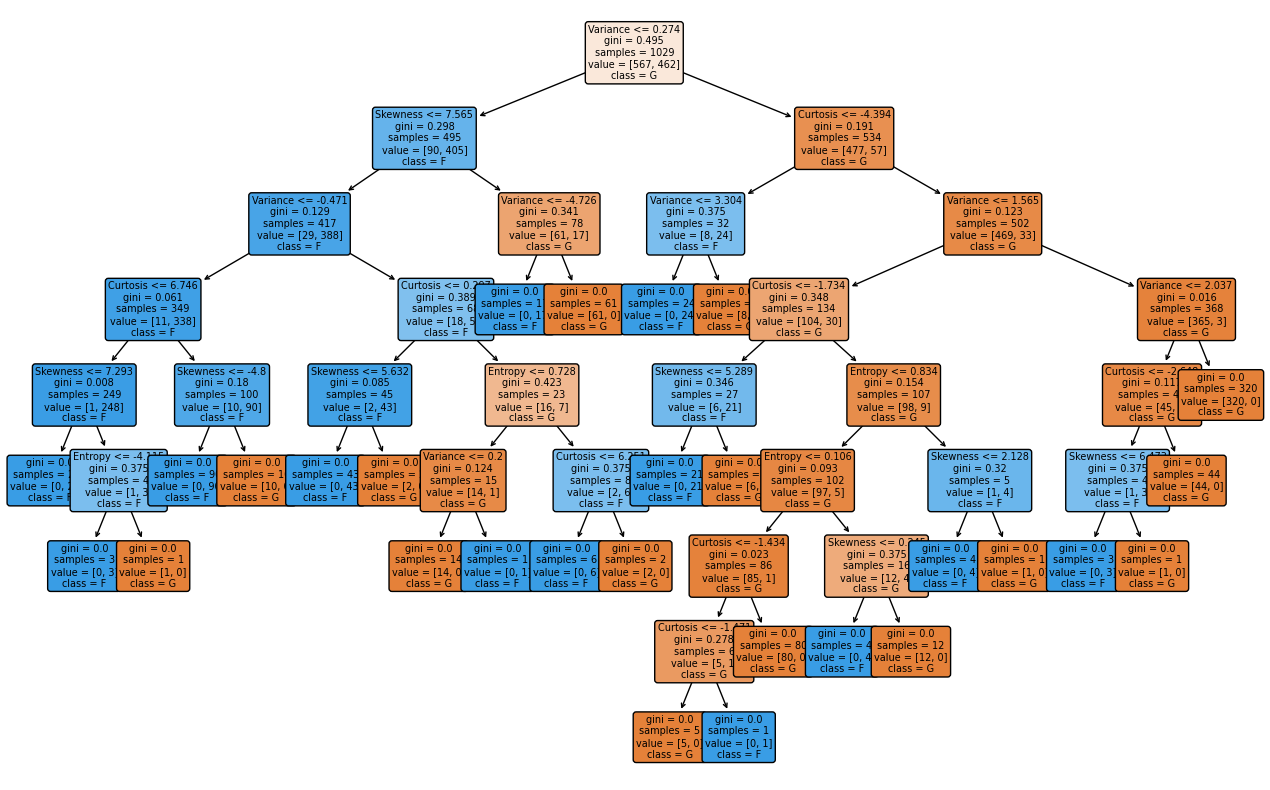

In [24]:
plt.figure(figsize=(16,10))

plot_tree(dt, fontsize= 7, rounded= True, class_names= ['G', 'F'],
         feature_names= x.columns, filled= True);

### importance

In [26]:
imp = dt.feature_importances_

In [27]:
imp

array([0.62095248, 0.21106862, 0.14189251, 0.02608639])

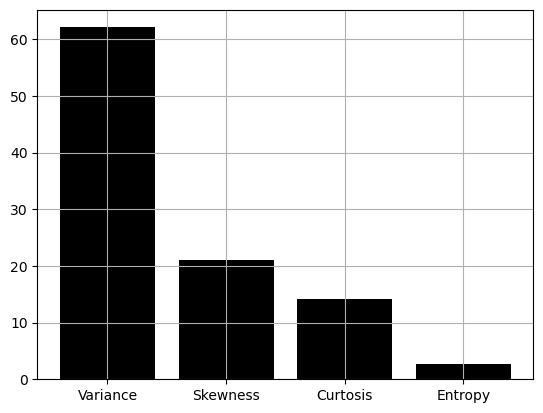

In [29]:
plt.bar(x.columns, imp * 100, color = 'black');
plt.grid()

### predict on new values

In [30]:
new = [[2.656160, 5.66610, -4.8073, -1.44699]]

In [31]:
dt.predict(new)

/home/aditya/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])